# Generalized Soliton Solutions of the Weyl Class by Carot and Verdaguer
##  Geoff Cope
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  University of Utah
##  January 9, 2022

https://www.researchgate.net/profile/Enric-Verdaguer/publication/231113255_Generalised_soliton_solutions_of_the_Weyl_class/links/02e7e5380dfbfde2aa000000/Generalised-soliton-solutions-of-the-Weyl-class.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,psi,z,dt,drho,dpsi,dz = symbols('t rho psi z dt drho dpsi dz')

In [4]:
f = Function('f')(rho,z)
f

In [5]:
U = Function('U')(rho,z)
U

In [38]:
K = Function('K')(rho,z)
K

In [7]:
variables = Matrix( [t,rho,psi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢ψ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,drho,dpsi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dpsi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand(  f*(drho**2 + dz**2) + exp(-2*U)*rho**2*dpsi**2 - exp(2*U)*dt**2  )
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅U(ρ, z)                                  ⎤
⎢-ℯ              0           0            0   ⎥
⎢                                             ⎥
⎢     0       f(ρ, z)        0            0   ⎥
⎢                                             ⎥
⎢                       2  -2⋅U(ρ, z)         ⎥
⎢     0          0     ρ ⋅ℯ               0   ⎥
⎢                                             ⎥
⎣     0          0           0         f(ρ, z)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2⋅U(ρ, z)                                  ⎤
⎢-ℯ              0           0            0   ⎥
⎢                                             ⎥
⎢     0       f(ρ, z)        0            0   ⎥
⎢                                             ⎥
⎢                       2  -2⋅U(ρ, z)         ⎥
⎢     0          0     ρ ⋅ℯ               0   ⎥
⎢                                             ⎥
⎣     0          0           0         f(ρ, z)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("T rho psi z")
t,rho,psi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                            ⎡ 2⋅U(ρ, z) ∂                                                                               
⎢                                            ⎢ℯ         ⋅──(U(ρ, z))                                                                     
⎢                                            ⎢           ∂ρ                                                                              
⎢                                            ⎢──────────────────────       0                             0                               
⎢                                            ⎢       f(ρ, z)                                                                             
⎢⎡             ∂               ∂          ⎤  ⎢                                                                                           
⎢⎢     0       ──(U(ρ, z))  0  ──(U(ρ, z))⎥  ⎢                        ∂                                                             ∂    
⎢⎢             ∂ρ              ∂z 

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                                                                         
⎢⎜   ∂                ∂             ∂          ⎟  2⋅U(ρ, z)                                                                              
⎢⎜ρ⋅───(U(ρ, z)) + ρ⋅───(U(ρ, z)) + ──(U(ρ, z))⎟⋅ℯ                                                                                       
⎢⎜    2                2            ∂ρ         ⎟                                                                                         
⎢⎝  ∂ρ               ∂z                        ⎠                                                                                         
⎢──────────────────────────────────────────────────────────                                                         0                    
⎢                        ρ⋅f(ρ, z)                                                                                                       
⎢                                 

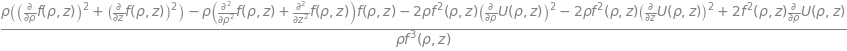

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞                  ⎛  ⎛             2                2⎞     ⎛  2              2         ⎞ 
⎢⎜   ∂                ∂             ∂          ⎟  2⋅U(ρ, z)       ⎜  ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟     ⎜ ∂              ∂          ⎟ 
⎢⎜ρ⋅───(U(ρ, z)) + ρ⋅───(U(ρ, z)) + ──(U(ρ, z))⎟⋅ℯ            0.5⋅⎜ρ⋅⎜⎜──(f(ρ, z))⎟  + ⎜──(f(ρ, z))⎟ ⎟ - ρ⋅⎜───(f(ρ, z)) + ───(f(ρ, z))⎟⋅
⎢⎜    2                2            ∂ρ         ⎟                  ⎜  ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠     ⎜  2              2         ⎟ 
⎢⎝  ∂ρ               ∂z                        ⎠                  ⎝                                        ⎝∂ρ             ∂z          ⎠ 
⎢────────────────────────────────────────────────────────── + ───────────────────────────────────────────────────────────────────────────
⎢                        ρ⋅f(ρ, z)                                                                                                       
⎢                                 

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡⎛      ⎛             2                2⎞         ⎛  2              2         ⎞                                   2                      
⎢⎜      ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟         ⎜ ∂              ∂          ⎟              2       ⎛∂          ⎞       2       ⎛∂      
⎢⎜0.5⋅ρ⋅⎜⎜──(f(ρ, z))⎟  + ⎜──(f(ρ, z))⎟ ⎟ - 0.5⋅ρ⋅⎜───(f(ρ, z)) + ───(f(ρ, z))⎟⋅f(ρ, z) - ρ⋅f (ρ, z)⋅⎜──(U(ρ, z))⎟  - ρ⋅f (ρ, z)⋅⎜──(U(ρ,
⎢⎜      ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠         ⎜  2              2         ⎟                      ⎝∂ρ         ⎠               ⎝∂z     
⎢⎝                                                ⎝∂ρ             ∂z          ⎠                                                          
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                                                      3                 
⎢                                 

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛    2                2                       ⎞                                                                                         
⎢⎜   ∂                ∂             ∂          ⎟  2⋅U(ρ, z)                                                                              
⎢⎜ρ⋅───(U(ρ, z)) + ρ⋅───(U(ρ, z)) + ──(U(ρ, z))⎟⋅ℯ                                                                                       
⎢⎜    2                2            ∂ρ         ⎟                                                                                         
⎢⎝  ∂ρ               ∂z                        ⎠                                                                                         
⎢──────────────────────────────────────────────────────────                                                                              
⎢                        ρ⋅f(ρ, z)                                                                                                       
⎢                                 

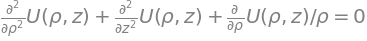

In [30]:
equation2 = Eq(expand( (1/rho)*ricciSimplified[0,0].args[2] ) ,0)
equation2

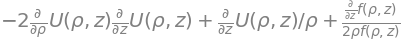

In [36]:
constraintKz = ricciSimplified[3,1]
constraintKz

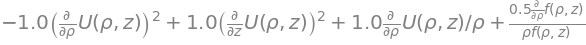

In [37]:
constraintKrho = einsteinSimplified[1,1]
constraintKrho

In [41]:
equation3b = Eq( K , Rational(1,2)*log(f) + U)
equation3b 

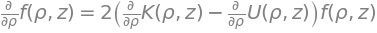

In [59]:
dfdrho = Eq(diff(f,rho) , solve( Eq(equation3b.lhs.diff(rho),equation3b.rhs.diff(rho)), diff(f,rho) )[0] ) 
dfdrho

In [58]:
dfdz = Eq(diff(f,z) , solve( Eq(equation3b.lhs.diff(z),equation3b.rhs.diff(z)), diff(f,z) )[0] ) 
dfdz

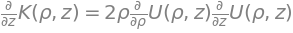

In [67]:
equation3a2 = Eq(diff(K,z) , solve( simplify(constraintKz.subs(dfdz.lhs,dfdz.rhs)), diff(K,z) )[0] ) 
equation3a2

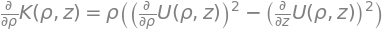

In [68]:
equation3a1 = Eq(diff(K,rho) , solve( simplify(constraintKrho.subs(dfdrho.lhs,dfdrho.rhs)), diff(K,rho) )[0] ) 
equation3a1

In [72]:
vacuumFieldEquations = Matrix([equation2,equation3a1,equation3a2])
vacuumFieldEquations

⎡                                ∂                ⎤
⎢    2              2            ──(U(ρ, z))      ⎥
⎢   ∂              ∂             ∂ρ               ⎥
⎢  ───(U(ρ, z)) + ───(U(ρ, z)) + ─────────── = 0  ⎥
⎢    2              2                 ρ           ⎥
⎢  ∂ρ             ∂z                              ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(K(ρ, z)) = ρ⋅⎜⎜──(U(ρ, z))⎟  - ⎜──(U(ρ, z))⎟ ⎟⎥
⎢∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(K(ρ, z)) = 2⋅ρ⋅──(U(ρ, z))⋅──(U(ρ, z))    ⎥
⎣    ∂z                ∂ρ          ∂z             ⎦

In [73]:
from sympy import *

In [74]:
X, Y = map(Function, 'XY')

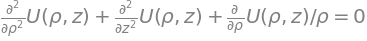

In [75]:
eq = vacuumFieldEquations[0]
eq

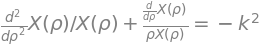

In [76]:
xODE = Eq(pde_separate( eq, U, [X(rho),Y(z)])[0] ,- k**2 ) 
xODE

In [77]:
xSolution = dsolve( xODE , X(rho))
xSolution 

In [78]:
#  this is made up.  we are arbitrarily setting one Bessel function equal to zero.  I think that one blows up at the orgin.  Go back and check this 
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

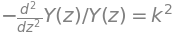

In [79]:
yODE = Eq( pde_separate( eq, U, [X(rho),Y(z)])[1] ,  k**2 ) 
yODE

In [80]:
ySolution = dsolve( yODE , Y(z))
ySolution 

In [81]:
#  Here we are arbitrarily setting the sin function to zero.  Go back and fix this
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],0).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

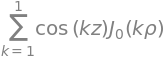

In [82]:
#  Here we arbitrary pick just one terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [85]:
psiSumOneTerms = Eq(U, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit() ) 
psiSumOneTerms

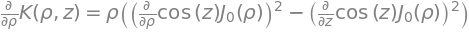

In [91]:
equation3a1.subs(psiSumOneTerms.lhs,psiSumOneTerms.rhs)

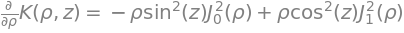

In [93]:
equation3a1.subs(psiSumOneTerms.lhs,psiSumOneTerms.rhs).doit().expand()

In [117]:
integrateKwrtRho = pdsolve( equation3a1.subs(psiSumOneTerms.lhs,psiSumOneTerms.rhs).doit().expand() ) 
integrateKwrtRho

In [118]:
KwrtRhoSolution = integrateKwrtRho.subs(integrateKwrtRho.rhs.args[2],0)
KwrtRhoSolution 

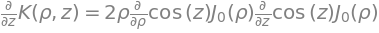

In [100]:
equation3a2.subs(psiSumOneTerms.lhs,psiSumOneTerms.rhs)

In [97]:
equation3a2.subs(psiSumOneTerms.lhs,psiSumOneTerms.rhs).doit()

In [119]:
integrateKwrtZ = pdsolve(equation3a2.subs(psiSumOneTerms.lhs,psiSumOneTerms.rhs).doit() )
integrateKwrtZ

In [121]:
KwrtZsolution = integrateKwrtZ.subs(integrateKwrtZ.rhs.args[1],0)
KwrtZsolution